In [70]:
import matplotlib.pyplot as plt
import numpy as np


In [71]:
#florida weather dataset-https://climatecenter.fsu.edu/products-services/data
lines=open('/home/shraddha/Desktop/florida.csv').read().split('\n')


In [72]:
labels=lines[0]
values=lines[1:]
n_values = len(values)
print(n_values)

23789


In [73]:
 # Break the list of comma-separated value strings into list of values
year = []
month = []
day = []
max_temp = []
#column numbers
#for now,we ignore min_temp,precipitation,mean_temp
j_year = 1
j_month = 2
j_day = 3
j_max_temp = 5
    

In [74]:
for i_row in range(n_values):
    split_values = values[i_row].split(',')
    if len(split_values) >= j_max_temp:
        year.append(int(split_values[j_year]))
        month.append(int(split_values[j_month]))
        day.append(int(split_values[j_day]))
        max_temp.append(float(split_values[j_max_temp]))

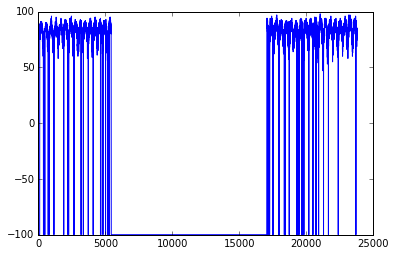

In [75]:
plt.plot(max_temp)
plt.show()

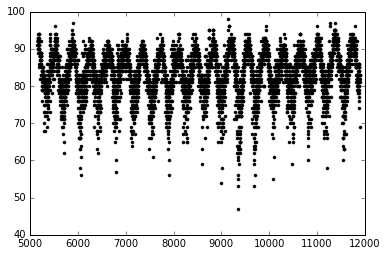

In [76]:
# Isolate the recent data.(period of 19 years)
i_mid = len(max_temp) // 2  #floor-division
temps = np.array(max_temp[i_mid:])
year = year[i_mid:]
month = month[i_mid:]
day = day[i_mid:]
temps[np.where(temps == -99.9)] = np.nan
plt.plot(temps,color='black',marker='.',linestyle='none')
plt.show()

In [77]:
# Remove all the nans.
# Trim both ends and fill nans in the middle.
# Find the first non-nan.
i_start = np.where(np.logical_not(np.isnan(temps)))[0][0]
temps = temps[i_start:]
year = year[i_start:]
month = month[i_start:]
day = day[i_start:]
i_nans = np.where(np.isnan(temps))[0]

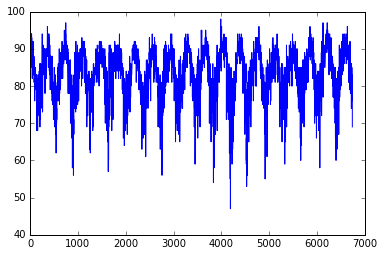

In [78]:
# Replace all nans with the most recent non-nan.
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i - 1]
plt.plot(temps)
plt.show()
#therefore,the dataset is cleaned completely

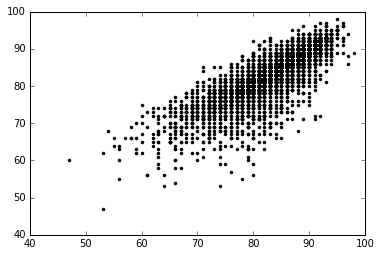

In [79]:
#determine whether the previous day's temperature is related to that of the following day(auto-corelation)
plt.plot(temps[:-1],temps[1:],color='black',marker='.',linestyle='none')
plt.show()

In [80]:
#show the relationship between two variables  by adding jitter
def scatter_plot(x,y):
    x_jitter=x+np.random.normal(size=x.size,scale=.5)
    y_jitter=y+np.random.normal(size=x.size,scale=.5)
    plt.plot(x_jitter,y_jitter,color='black',marker='.',linestyle='none',alpha=.1)
    plt.show()


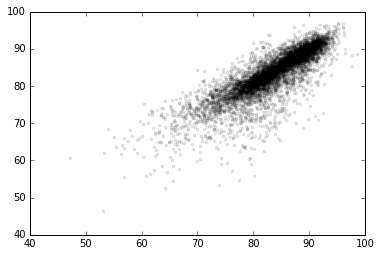

In [81]:
#to get a much smoother spread
scatter_plot(temps[:-1],temps[1:])
#intuiton-it's like y=x line
#so yesterday's temp=today's temp(approx) 

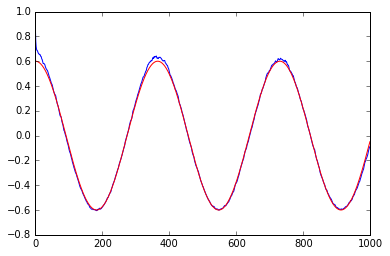

In [82]:

#shift=3
auto_corr=[]
for shift in range(1,1000):
    corr=np.corrcoef(temps[:-shift],temps[shift:])[1,0]
    auto_corr.append(corr)
#add a sine wave approximation
plt.plot(auto_corr)
d=np.arange(1000)
fit=.6*np.cos(2*np.pi*d/365)
plt.plot(fit,color='red')
plt.show()
    

In [83]:
def find_day_of_year(year, month, day):
    """
    Convert year, month, date to day of the year.
    January 1 = 0

    Parameters
    ----------
    year: int
    month: int
    day: int

    Returns
    -------
    day_of_year: int
    """
    days_per_month = np.array([
        31,  # January
        28,  # February
        31,  # March
        30,  # April
        31,  # May
        30,  # June
        31,  # July
        31,  # August
        30,  # September
        31,  # October
        30,  # November
        31,  # December
    ])
    # For leap years
    if year % 4 == 0:
        days_per_month[1] += 1

    day_of_year = np.sum(np.array(
        days_per_month[:month - 1])) + day - 1
    return day_of_year

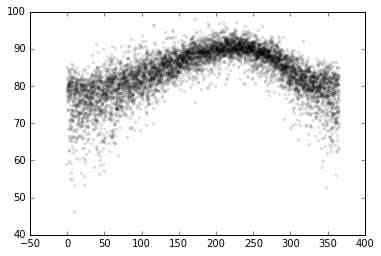

In [85]:

    
    
day_of_year = np.zeros(temps.size)
for i_row in range(temps.size):
    day_of_year[i_row] = find_day_of_year(
                year[i_row], month[i_row], day[i_row])
    
scatter_plot(day_of_year,temps)

#Create 10-day medians for each day of the year.
median_temp_calendar = np.zeros(366)
for i_day in range(0, 365):
    low_day = i_day - 5
    high_day = i_day + 4
    if low_day < 0:
        low_day += 365
    if high_day > 365:
        high_day += -365
    if low_day < high_day:
        i_window_days = np.where(np.logical_and(day_of_year >= low_day,
                                   day_of_year <= high_day))
    else:
        i_window_days = np.where(np.logical_or(day_of_year >= low_day,
                                  day_of_year <= high_day))

        ten_day_median = np.median(temps[i_window_days])
        median_temp_calendar[i_day] = ten_day_median

    if i_day == 364:
        median_temp_calendar[365] = ten_day_median

